In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:

# Replace 'error_bad_lines' with 'on_bad_lines' and set it to 'skip' to ignore bad lines.
df = pd.read_csv('/content/drive/MyDrive/Setiment Analysis/IMDB Dataset.csv', encoding='utf-8', on_bad_lines='skip', engine='python')

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [40]:
df.shape

(4761, 2)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4761 entries, 0 to 4760
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     4761 non-null   object
 1   sentiment  4761 non-null   object
dtypes: object(2)
memory usage: 74.5+ KB


Text(0.5, 1.0, 'Sentiment distribution')

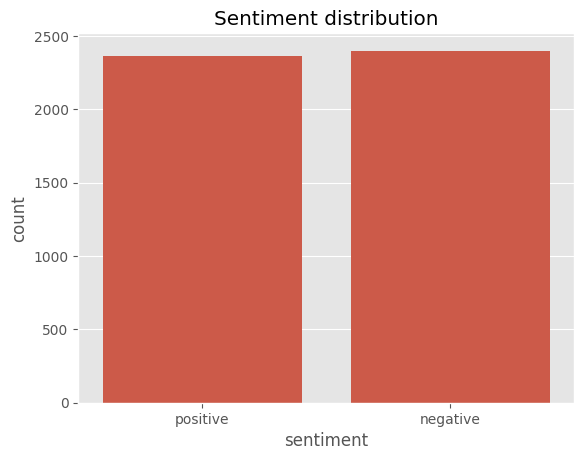

In [42]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [43]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [44]:
def no_of_words(text):
    words = text.split()  # Splits the text into words based on spaces
    word_count = len(words)  # Counts the number of words
    return word_count


In [45]:
df['word count'] = df['review'].apply(no_of_words)

In [46]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


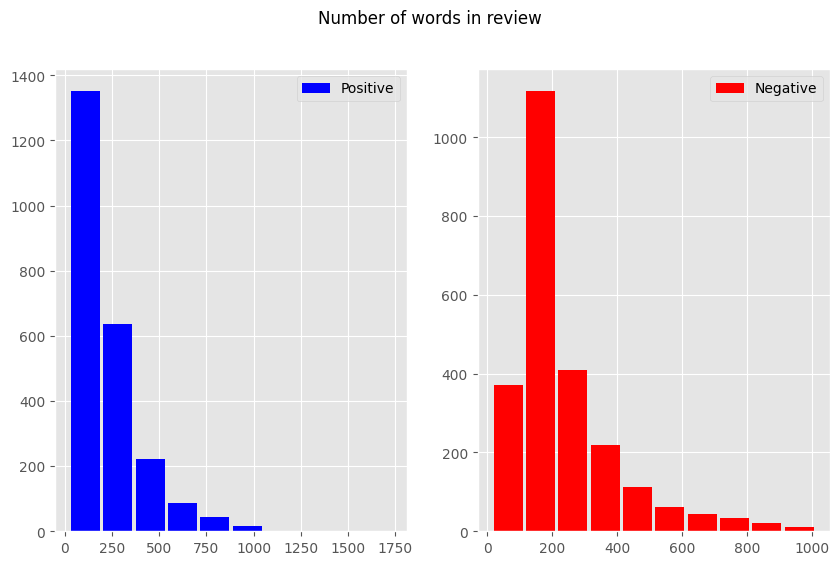

In [47]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

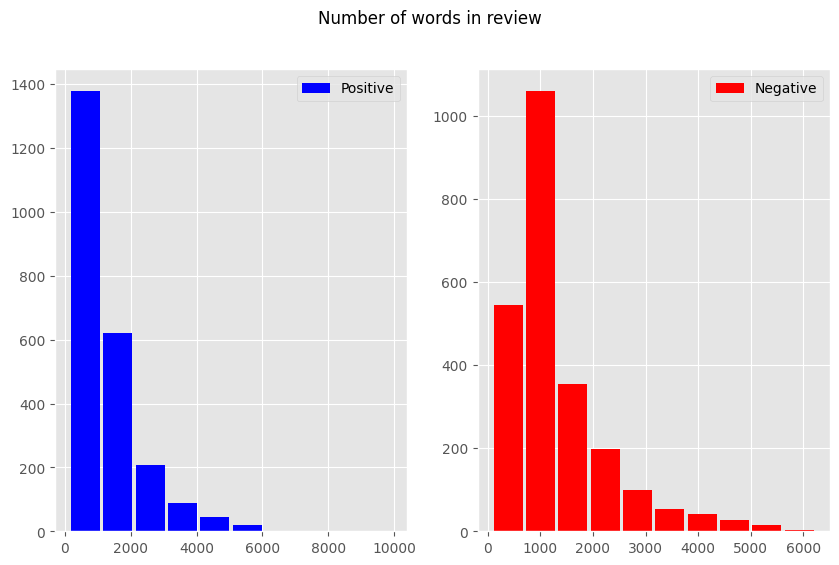

In [48]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [49]:
df['sentiment'] = df['sentiment'].replace({"positive": 1, "negative": 0})


<ipython-input-49-1da6fdfe04aa>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace({"positive": 1, "negative": 0})


In [50]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [53]:
nltk.download('punkt_tab')
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [54]:
df['review'] = df['review'].apply(data_processing)


In [55]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  3


In [56]:
df = df.drop_duplicates('review')

In [57]:
stemmer = PorterStemmer()

def stemming(data):
    text = [stemmer.stem(word) for word in data.split()]  # Ensure you split the text into words
    return " ".join(text)  # Return the processed text as a string


In [58]:
df.review = df['review'].apply(lambda x: stemming(x))

In [59]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,one review mention watch 1 oz episod youll hoo...,1,168
1,wonder littl product film techniqu unassum old...,1,84
2,thought wonder way spend time hot summer weeke...,1,86
3,basic there famili littl boy jake think there ...,0,67
4,petter mattei love time money visual stun film...,1,125


In [60]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
0,one review mention watch 1 oz episod youll hoo...,1,168
1,wonder littl product film techniqu unassum old...,1,84
2,thought wonder way spend time hot summer weeke...,1,86
4,petter mattei love time money visual stun film...,1,125
5,probabl alltim favorit movi stori selfless sac...,1,58


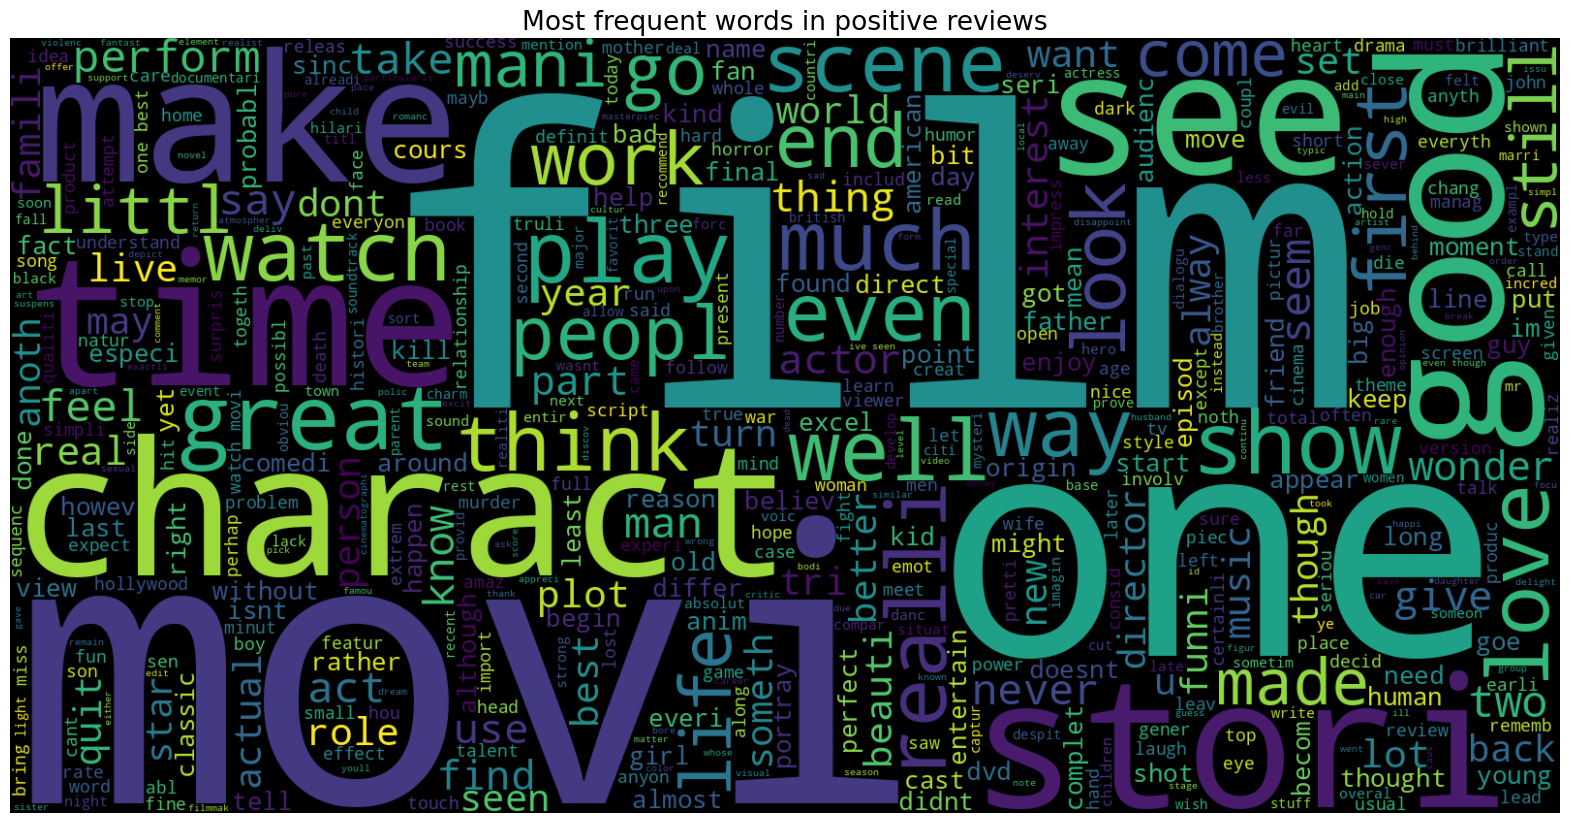

In [61]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [62]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 4488),
 ('movi', 4128),
 ('one', 2528),
 ('like', 1789),
 ('time', 1399),
 ('see', 1373),
 ('good', 1354),
 ('stori', 1288),
 ('watch', 1247),
 ('make', 1247),
 ('charact', 1243),
 ('get', 1202),
 ('great', 1126),
 ('love', 1124),
 ('well', 1085)]

In [63]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,4488
1,movi,4128
2,one,2528
3,like,1789
4,time,1399


In [64]:
px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color = 'word')

In [71]:
neg_reviews =  df[df.sentiment == 0]
neg_reviews.head()


,review,sentiment,word count
3,basic there famili littl boy jake think there ...,0,67
7,show amaz fresh innov idea 70 first air first ...,0,83
8,encourag posit comment film look forward watch...,0,64
10,phil alien one quirki film humour base around ...,0,51
11,saw movi 12 came recal scariest scene big bird...,0,84


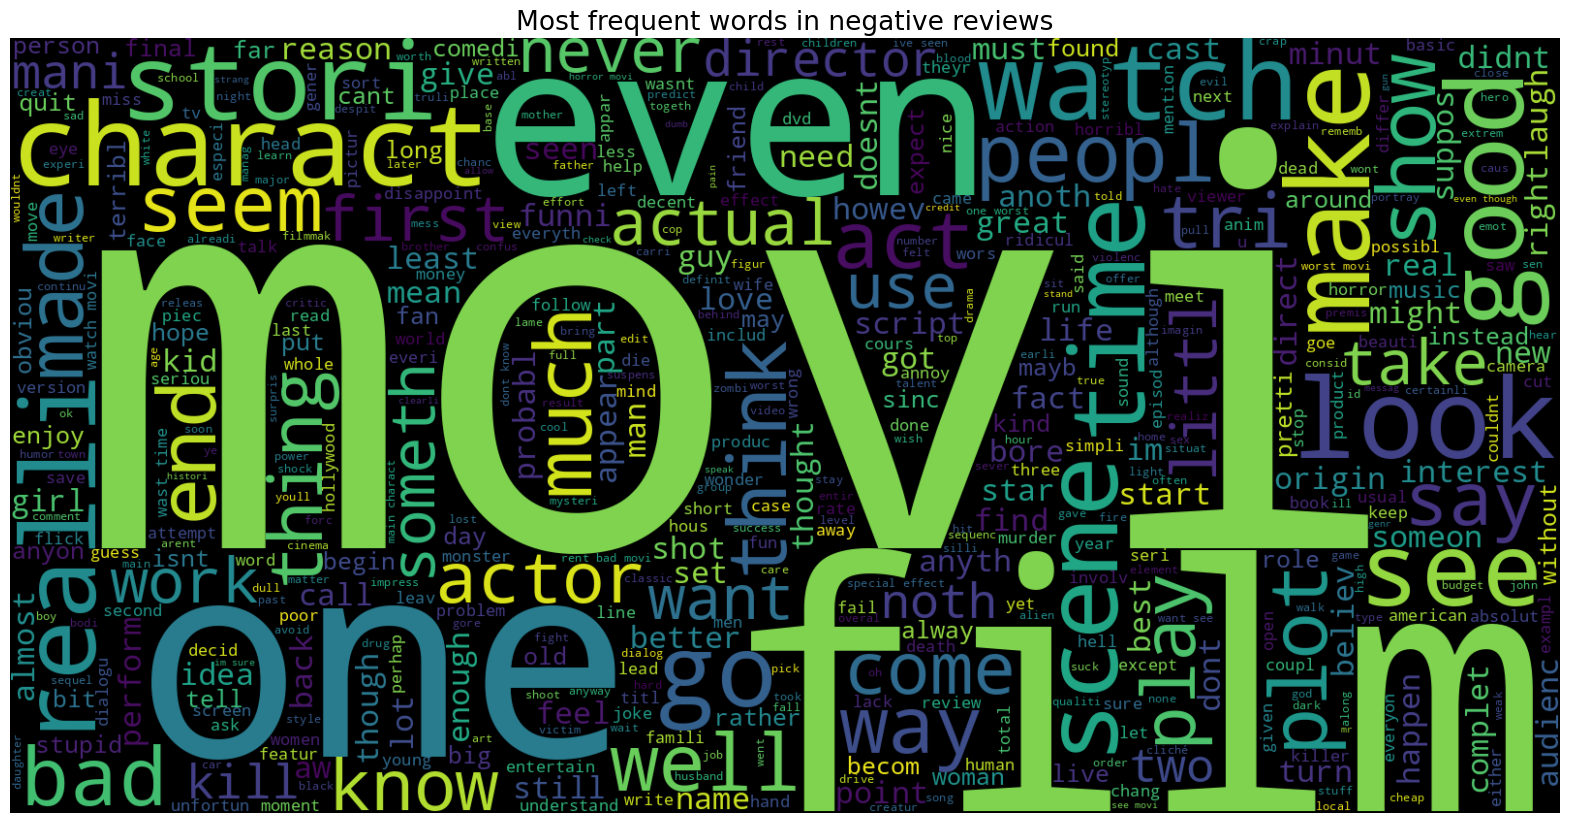

In [72]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [73]:

count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movi', 5311),
 ('film', 4191),
 ('one', 2400),
 ('like', 2313),
 ('make', 1526),
 ('get', 1523),
 ('even', 1513),
 ('good', 1428),
 ('watch', 1382),
 ('bad', 1378),
 ('time', 1335),
 ('charact', 1321),
 ('would', 1321),
 ('see', 1249),
 ('realli', 1149)]

In [74]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movi,5311
1,film,4191
2,one,2400
3,like,2313
4,make,1526


In [75]:
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')

In [76]:
X = df['review']
Y = df['sentiment']

In [78]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [80]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (3330, 39957)
Size of y_train:  (3330,)
Size of x_test:  (1428, 39957)
Size of y_test:  (1428,)


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [82]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 84.80%


In [83]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[601 131]
 [ 86 610]]


              precision    recall  f1-score   support

           0       0.87      0.82      0.85       732
           1       0.82      0.88      0.85       696

    accuracy                           0.85      1428
   macro avg       0.85      0.85      0.85      1428
weighted avg       0.85      0.85      0.85      1428



In [84]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 83.12%


In [85]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[655  77]
 [164 532]]


              precision    recall  f1-score   support

           0       0.80      0.89      0.84       732
           1       0.87      0.76      0.82       696

    accuracy                           0.83      1428
   macro avg       0.84      0.83      0.83      1428
weighted avg       0.84      0.83      0.83      1428



In [86]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 84.94%


In [87]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[609 123]
 [ 92 604]]


              precision    recall  f1-score   support

           0       0.87      0.83      0.85       732
           1       0.83      0.87      0.85       696

    accuracy                           0.85      1428
   macro avg       0.85      0.85      0.85      1428
weighted avg       0.85      0.85      0.85      1428



In [88]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.778 total time=   0.0s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.787 total time=   0.0s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.755 total time=   0.0s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.797 total time=   0.0s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.778 total time=   0.0s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.868 total time=   0.0s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.851 total time=   0.0s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.824 total time=   0.0s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.862 total time=   0.0s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.841 total time=   0.0s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.854 total time=   0.4s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [89]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.85
best parameters:  {'C': 1, 'loss': 'hinge'}


In [90]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 85.22%


In [91]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[612 120]
 [ 91 605]]


              precision    recall  f1-score   support

           0       0.87      0.84      0.85       732
           1       0.83      0.87      0.85       696

    accuracy                           0.85      1428
   macro avg       0.85      0.85      0.85      1428
weighted avg       0.85      0.85      0.85      1428



In [92]:
!git clone https://github.com/NoumanYousaf14/Sentiment-Analysis-with-IMDB-Reviews.git

Cloning into 'Sentiment-Analysis-with-IMDB-Reviews'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
